<a href="https://colab.research.google.com/github/haxorsprogramming/Simple-CNN/blob/main/CNN_ADITIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libary

In [212]:
import os
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt

In [213]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [214]:
data_model = "model"
dataset_dir = "dataset"

In [215]:
data_dir = pathlib.Path(dataset_dir)

In [216]:
batch_size = 32
size = 180

In [217]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(size, size),
    batch_size=batch_size
)

Found 120 files belonging to 5 classes.
Using 96 files for training.


In [218]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(size, size),
    batch_size=batch_size
)

Found 120 files belonging to 5 classes.
Using 24 files for validation.


In [219]:
class_names = train_dataset.class_names

In [220]:
AUTOTUNE = tf.data.AUTOTUNE

In [221]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [222]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [223]:
normalized_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]

In [224]:
num_classes = len(class_names)

In [225]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(size, size, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)    
])


In [226]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [227]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 45, 45, 64)      

In [228]:
epochs = 10

In [229]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)


Epoch 1/10
3/3 [==============================] - 4s 1s/step - loss: 2.2430 - accuracy: 0.1771 - val_loss: 1.4618 - val_accuracy: 0.2083
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 1.4497 - accuracy: 0.2917 - val_loss: 1.3788 - val_accuracy: 0.2917
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 1.3639 - accuracy: 0.3125 - val_loss: 1.4251 - val_accuracy: 0.3333
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 1.2627 - accuracy: 0.5000 - val_loss: 1.3917 - val_accuracy: 0.2083
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 1.1128 - accuracy: 0.5312 - val_loss: 1.4700 - val_accuracy: 0.2500
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 0.9124 - accuracy: 0.7083 - val_loss: 1.2530 - val_accuracy: 0.4583
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 0.7207 - accuracy: 0.7708 - val_loss: 1.2032 - val_accuracy: 0.5000
Epoch 8/10
3/3 [=========================

In [230]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

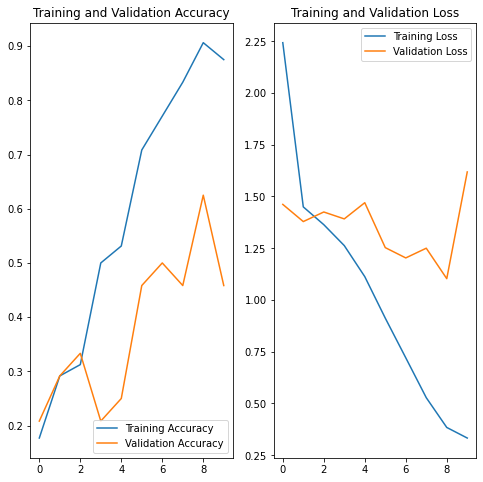

In [231]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Grafik training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [232]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal",
                                                    input_shape = (size, 
                                                                  size, 
                                                                  3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

In [233]:
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [234]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [235]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_14 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [236]:
epochs = 15
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

Epoch 1/15
3/3 [==============================] - 5s 1s/step - loss: 2.2249 - accuracy: 0.2083 - val_loss: 2.1818 - val_accuracy: 0.1667
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 1.6648 - accuracy: 0.3229 - val_loss: 1.5387 - val_accuracy: 0.0833
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 1.4468 - accuracy: 0.2917 - val_loss: 1.4818 - val_accuracy: 0.0833
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 1.3726 - accuracy: 0.3021 - val_loss: 1.4514 - val_accuracy: 0.1667
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 1.2563 - accuracy: 0.3750 - val_loss: 1.3508 - val_accuracy: 0.2917
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 1.0787 - accuracy: 0.5729 - val_loss: 1.0743 - val_accuracy: 0.5000
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 1.0075 - accuracy: 0.6250 - val_loss: 0.9459 - val_accuracy: 0.5417
Epoch 8/15
3/3 [=========================

In [237]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

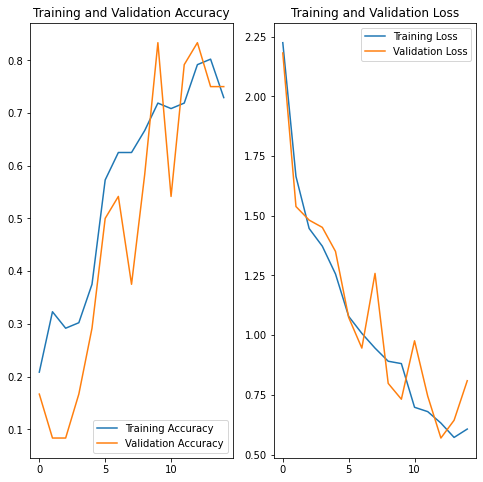

In [238]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Grafik training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [239]:
if not os.path.exists(data_model):
  os.makedirs(data_model)

model.save(data_model, overwrite=True)

INFO:tensorflow:Assets written to: model/assets


### Tahap pengujian

In [240]:
num_classes = len(class_names)
class_names

['.ipynb_checkpoints', 'daisy', 'roses', 'sunflower', 'tulips']

In [241]:
model = keras.models.load_model(data_model)

In [242]:
img_pred_dir = 'prediction/sunflower.jpg'

In [243]:
img_pred = keras.preprocessing.image.load_img(
    img_pred_dir, target_size=(size, size)
)

In [244]:
img_pred_array = keras.preprocessing.image.img_to_array(img_pred)
img_pred_array = tf.expand_dims(img_pred_array, 0)

In [245]:
prediction = model.predict(img_pred_array)
score = tf.nn.softmax(prediction[0])

In [246]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to tulips with a 39.19 percent confidence.
